# ¡Llena ese carrito!

# Contents <a id='back'></a>


# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
orders=pd.read_csv('/datasets/instacart_orders.csv', sep=';')
product=pd.read_csv('/datasets/products.csv', sep=';')
aisles=pd.read_csv('/datasets/aisles.csv', sep=';')
depart=pd.read_csv('/datasets/departments.csv', sep=';')
order_product=pd.read_csv('/datasets/order_products.csv', sep=';')

In [3]:
# mostrar información del DataFrame
display(orders.head())
orders.info()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
display(product.head())
product.info()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
display(aisles.head())
aisles.info()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
display(depart.head())
depart.info()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame
display(order_product.head())
order_product.info(show_counts=True)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

-Para **orders**, la columna "days_since_prior_order" presenta datos ausentes.

-En **product**, la columna "product_name" presenta valores ausentes.

-En **order_product**, la columna "add_to_cart_order" presentan valores ausentes.

-En **aisles** y **department** no se tiene valores ausentes.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
np.array_equal(orders['user_id'],orders['user_id'].astype('int'))

True

In [9]:
# Revisa si hay pedidos duplicados
orders[orders.duplicated()] #para obtener filas duplicadas

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común? 

Las lineas duplicadas tienen en común el día de la semana en que se realizo el pedido y la hora, miercoles a las 02:00 horas.

In [10]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
dup=orders[(orders['order_dow']==3) & (orders['order_hour_of_day']==2)]
dup

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?

Si existen pedidos los miercoles a las 02:00 horas, por lo que los duplicados puede haber sido generados por un bug al almacenarlos.

In [11]:
# Elimina los pedidos duplicados
orders=orders.drop_duplicates().reset_index(drop=True)
orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478947,3210681,5617,5,1,14,7.0
478948,3270802,112087,2,3,13,6.0
478949,885349,82944,16,2,11,6.0
478950,216274,4391,3,3,8,8.0


In [12]:
# Vuelve a verificar si hay filas duplicadas
orders.duplicated().sum() #no hay mas duplicados

0

In [13]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
orders['order_id'].duplicated().sum()

0

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


Se eliminó la filas de duplicadas del DataFrame "orders", debido a que los valores duplicados fueron por problemas externos.

### `products` data frame

In [15]:
# Verifica si hay filas totalmente duplicadas
product.duplicated().sum()    #No hay filas totalmente duplicadas

0

In [16]:
# Verifica únicamente si hay IDs duplicadas de productos
product['product_id'].duplicated().sum()   #No hay Id de productos duplicados

0

In [17]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

product['product_name']=product['product_name'].str.upper() #convertimos a mayusculas

product[product['product_name'].duplicated()] #obtenemos los duplicados de la columna "product_name"

,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [18]:
# Revisa si hay nombres duplicados de productos no faltantes
dupl_no_aus=product[(~product['product_name'].isna()) & (product['product_name'].duplicated())]
dupl_no_aus

,product_id,product_name,aisle_id,department_id
2058,2059,BIOTIN 1000 MCG,47,11
5455,5456,GREEN TEA WITH GINSENG AND HONEY,96,20
5558,5559,CREAM OF MUSHROOM SOUP,69,15
7558,7559,CINNAMON ROLLS WITH ICING,105,13
9037,9038,AMERICAN CHEESE SLICES,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [19]:
#mostrando uno de los products de nombre duplicado
product[product['product_name']=='GREEN TEA WITH GINSENG AND HONEY']

,product_id,product_name,aisle_id,department_id
2037,2038,GREEN TEA WITH GINSENG AND HONEY,94,7
5455,5456,GREEN TEA WITH GINSENG AND HONEY,96,20
19813,19814,GREEN TEA WITH GINSENG AND HONEY,94,7



Describe brevemente tus hallazgos y lo que hiciste con ellos.

Cada producto tiene un "id" único estos no se eliminaran, sin embargo se observa que algunos productos llevan  "&", "and", "with" lo cual podría indicar que algunos productos se agruparon al colocar el nombre. 

### `departments` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
depart.duplicated().sum()    # No hay filas duplicadas

0

In [21]:
# Revisa únicamente si hay IDs duplicadas de productos
depart.duplicated(subset='department_id').sum()     # No hay dupliacdos en esta columna

0

In [22]:
len(depart['department_id'])

21

No existen filas duplicadas en este DataFrame.

### `aisles` data frame

In [23]:
# Revisa si hay filas totalmente duplicadas
aisles.duplicated().sum()  #No hay filas totalmente duplicadas

0

In [24]:
# Revisa únicamente si hay IDs duplicadas de productos
aisles.duplicated(subset='aisle_id').sum()  # No hay duplicados en esta columna

0

No existen filas duplicadas en este DataFrame.

### `order_products` data frame

In [25]:
# Revisa si hay filas totalmente duplicadas
order_product.duplicated().sum()    #No hay filas totalmente duplicadas

0

In [26]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order_product.duplicated(subset=['order_id', 'product_id']).sum() # No hay duplicados en esta columna

0

No existen filas duplicadas en este DataFrame.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [27]:
# Encuentra los valores ausentes en la columna 'product_name'
product[product['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


A primera vista se observa que los productos con nombre ausente pueden tener en comun al encontrarse en el pasillo 100 y departamento 21.

In [28]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
product[(product['product_name'].isna()) & (product['aisle_id']!=100)]

,product_id,product_name,aisle_id,department_id


Describe brevemente cuáles son tus hal

Los nombres del producto del pasillo 100 esta relacionado con los productos cuyos nombres son "ausente".

In [29]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
product[(product['product_name'].isna()) & (product['department_id']!=21)]

,product_id,product_name,aisle_id,department_id



Los nombres del producto del departamento 21 esta relacionado con los productos cuyos nombres son "ausente".

In [30]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
display(depart[depart['department_id']==21]['department'])
aisles[aisles['aisle_id']==100]['aisle']

20    missing
Name: department, dtype: object

99    missing
Name: aisle, dtype: object


Se observa en ambas tablas de **department** y **aisle** que el pasillo y departamento son 'missing', o productos desconocidos.

In [31]:
# Completa los nombres de productos ausentes con 'Unknown'
product['product_name']=product['product_name'].fillna('Unknown')
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB



Los valores ausentes en realidad pertenecian a un departamento y pasillo especifico, se reemplazo los valores ausentes, ahora llamado los productos como "Unknown".


### `orders` data frame

In [32]:
# Encuentra los valores ausentes
orders[orders['days_since_prior_order'].isna()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478880,2589657,205028,1,0,16,NaN
478881,2222353,141211,1,2,13,NaN
478907,2272807,204154,1,1,15,NaN
478911,2499542,68810,1,4,19,NaN


In [33]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
orders[(orders['days_since_prior_order'].isna()) & (~orders['order_number']==1)] 
# valores ausentes porque es primera orden

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order



Los valores ausentes en la columna "days_since_prior_order" son aquellos clientes que ordenan por primera vez, con lo que no hay registro de una compra previa. Estos valores no se eliminaran.


### `order_products` data frame

In [34]:
# Encuentra los valores ausentes
order_product[order_product['add_to_cart_order'].isna()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [35]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
display(order_product['add_to_cart_order'].min())
order_product['add_to_cart_order'].max()

1.0

64.0

El orden secuencial en el que se añade un producto al carrito, sin considerar los valores ausentes, varía desde 1 a 64.

<function matplotlib.pyplot.show(close=None, block=None)>

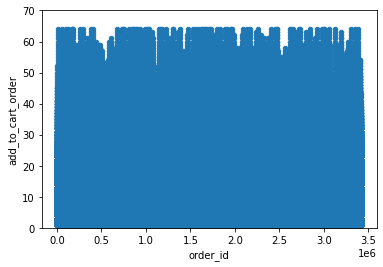

In [36]:
order_product.plot(x='order_id', y='add_to_cart_order', kind='scatter', ylim=[0,70])
plt.show

In [37]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
id_order_product=order_product[order_product['add_to_cart_order'].isna()]['order_id']
id_order_product

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64

In [38]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
orders_product=order_product[order_product['order_id'].isin(id_order_product)].groupby('order_id')
orders_product['product_id'].count().min()

65

Para los pedidos con valores ausentes si presentan como mínimo desde 65 productos.

In [39]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_product['add_to_cart_order']=order_product['add_to_cart_order'].fillna(999)
display(np.array_equal(order_product['add_to_cart_order'],order_product['add_to_cart_order'].astype('int')))
order_product['add_to_cart_order']=order_product['add_to_cart_order'].astype('int')
display(order_product.info(show_counts=True))
order_product['add_to_cart_order'].dtypes

True

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


None

dtype('int64')

Se reemplazo los valores ausentes de la columna "add_to_cart_order" y luego se convirtió a valores entero, previa verificación con "np" para que no se pierdan datos.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

En esta parte del prepocesamiento de datos, en primer lugar se analizó cada DataFrame para encontrar valores duplicados y como se debe proceder ante ello, para el DataFrame **orders** se eliminaron filas duplicadas, las cuales fueron generales por factores externos, para **products** se encontró valores duplicados en la columna "product_name" pero al encontrarse que cada uno de ellos presenta una identificación "id" unica, se procedió a mantenerlos. Luego en los DataFrame **depart**, **aisle** y **order_product** no se encontraron valores duplicados con lo que no se realizó alguna acción.

Por otra parte, para los valores ausentes del DataFrame **product** al analizarlo se comprobó que estos pertenecián a un pasillo y departamento específico, por lo que se procesió a llamar "Unknown", en el DF **order** se encontro valores ausentes sin embargo estos se debian a que las personas realizaban su primer pedido, por lo que no habia registro de una orden previa, por útlimo para el DF **order_product** se procedió a reemplazar estos valores ausentes al determinar que estos son mayores a 65 para luego convertirlos a formato de número entero.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [40]:
#se utiliza "unique()" para verificar los valores sensibles
hora=sorted(orders['order_hour_of_day'].unique())
hora

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [41]:
#se utiliza "unique()" para verificar los valores sensibles

dia=sorted(orders['order_dow'].unique())
dia

[0, 1, 2, 3, 4, 5, 6]


Los valores de amas columnas son razonables al estar dentro del rango.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

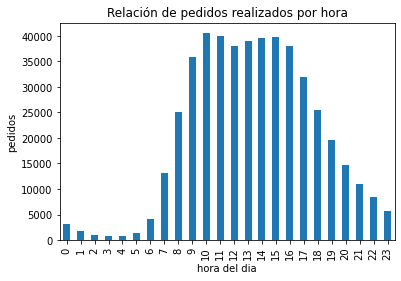

In [42]:
orders.groupby('order_hour_of_day')['user_id'].count().plot(kind='bar', xlabel='hora del dia', ylabel='pedidos', title='Relación de pedidos realizados por hora')
plt.show()

Se observa graficamente que empieza a crecer los pedidos desde las 08:00 horas alcanzando su pico maximo en a las 10:00, y empiza a decaer desde las 17:00, ubicandose los picos a la "hora del almuerzo".

In [43]:
orders.groupby('order_hour_of_day')['user_id'].count()

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: user_id, dtype: int64

El la tabla anterior se muestra los pedidos para cada hora del día.

### [A3] ¿Qué día de la semana compran víveres las personas?

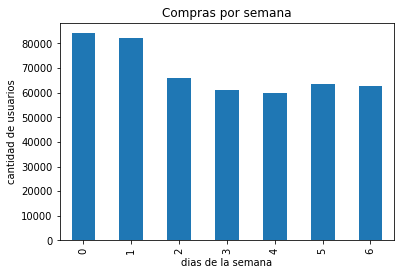

In [44]:
#se crea un grafica de barras para saber que dia de la semana se compran mas viveres
orders.groupby('order_dow')['user_id'].count().plot(kind='bar', ylabel='cantidad de usuarios', xlabel='dias de la semana', 
                                                    title='Compras por semana')
plt.show()

In [45]:
orders.groupby('order_dow')['user_id'].count()

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: user_id, dtype: int64

En la tabla anterior se muestra la canidad de personas compran viveres, que en su mayoría son los dias domingo.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

<AxesSubplot:>

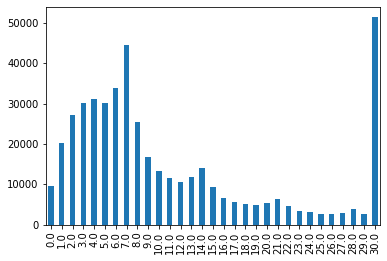

In [46]:
orders['days_since_prior_order'].value_counts().sort_index().plot(kind='bar')
#se realizo un grafico de barras contando lo que se demora una persona en volver a realizar un pedido

In [47]:
#se muestra la tabla
orders['days_since_prior_order'].value_counts().sort_index()

0.0      9589
1.0     20179
2.0     27138
3.0     30224
4.0     31006
5.0     30096
6.0     33930
7.0     44577
8.0     25361
9.0     16753
10.0    13309
11.0    11467
12.0    10658
13.0    11737
14.0    13992
15.0     9416
16.0     6587
17.0     5498
18.0     4971
19.0     4939
20.0     5302
21.0     6448
22.0     4514
23.0     3337
24.0     3015
25.0     2711
26.0     2640
27.0     2986
28.0     3745
29.0     2673
30.0    51337
Name: days_since_prior_order, dtype: int64

In [48]:
orders['days_since_prior_order'].describe()

count    450135.000000
mean         11.101814
std           9.190004
min           0.000000
25%           4.000000
50%           7.000000
75%          15.000000
max          30.000000
Name: days_since_prior_order, dtype: float64

En la grafica se observa que la gran mayoría de personas esperan 30 días para realizar su proximo pedido, el valor mínimo es 26 días, es decir pocas personas esperan 26 dias para realizar un pedido nuevamente.Por un lado, tambien las personas realizan pedidos semanales (valor 7), los cuales podrían ser los fines de semana. Por otra parte, tambien se observa parte de las personas realizan ordenes diarias (valor 0).

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [49]:
mierc=orders[orders['order_dow']==3]['order_hour_of_day'].value_counts().sort_index() #filtramos por dia miercoles
sabad=orders[orders['order_dow']==6]['order_hour_of_day'].value_counts().sort_index() #filtramos por dia sabado

,miercoles,sabado
0,373,464
1,215,254
2,106,177
3,101,125
4,108,118
5,170,161
6,643,451
7,1732,1619
8,3125,3246
9,4490,4311


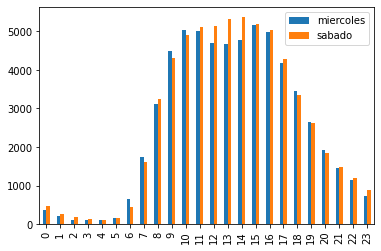

In [50]:
#concatenamos
graf=pd.concat([mierc,sabad], axis='columns')
graf.columns=['miercoles', 'sabado']
display(graf)
graf.plot(kind='bar')
plt.show()

Los pedidos aumentan los días sabados entre las 9:00horas hasta las 17:00horas, esto podría deberse al fin de semana y que la gente no suele cocinar estos días. Para los miércoles tambien se realizan pedidos a esas horas, pero en comparación a los sábados este se mantiene alrededor del mediodia para luego volver a subir, esto podría deberse a que algunas personas se encuentren en horario laborable y tenga determinadas horas para almorzar(15:00horas), luego procede a bajar siendo mayor al de los sabados en cuanto mas tarde es.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

<AxesSubplot:>

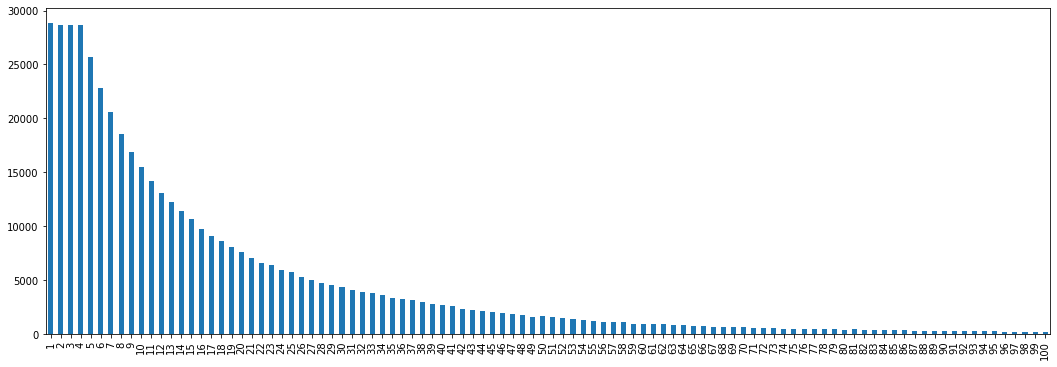

In [51]:
orders['order_number'].value_counts().sort_index().plot(kind='bar', figsize=[18,6])

In [52]:
orders['order_number'].value_counts().sort_index()

1      28817
2      28633
3      28685
4      28703
5      25661
       ...  
96       220
97       221
98       191
99       169
100      194
Name: order_number, Length: 100, dtype: int64

La gran mayoría de clientes de la aplicación hicieron de 1 a 10 pedidos, luego el ritmo baja hasta llegar a 100 pedidos el cual solo lo realizaron 194 clientes. Esto puede deberse a que el cliente compra lo necesario, es decir para el momento, los que compran en cantidad podria deberse a que compran quincenal o mensual.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [53]:
order_product.groupby('product_id')['order_id'].nunique().sort_values(ascending=False).head(20)
#agrupamos por id del producto y contamos los mas ordenamos del mayor pedido al menor

product_id
24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
47766    24689
47626    21495
16797    20018
26209    19690
27845    19600
27966    19197
22935    15898
24964    15292
45007    14584
39275    13879
49683    13675
28204    12544
5876     12232
8277     11993
40706    11781
Name: order_id, dtype: int64

In [54]:
tablas=order_product.merge(product, on='product_id')

In [55]:
populares=tablas.groupby(['product_id', 'product_name']).size().reset_index(name='popularity').sort_values(by='popularity', ascending=False).head(20)

In [56]:
populares

,product_id,product_name,popularity
22808,24852,BANANA,66050
12025,13176,BAG OF ORGANIC BANANAS,53297
19370,21137,ORGANIC STRAWBERRIES,37039
20077,21903,ORGANIC BABY SPINACH,33971
43271,47209,ORGANIC HASS AVOCADO,29773
43788,47766,ORGANIC AVOCADO,24689
43663,47626,LARGE LEMON,21495
15364,16797,STRAWBERRIES,20018
24047,26209,LIMES,19690
25556,27845,ORGANIC WHOLE MILK,19600


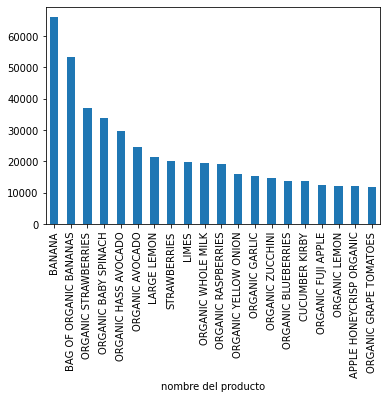

In [57]:
populares.plot(kind='bar', x='product_name', y='popularity', legend=False, xlabel='nombre del producto')
plt.show()

Las frutas y verduras tienen mayor popularidad, siendo el lider la "Banana" como se observa en el cuadro anterior.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

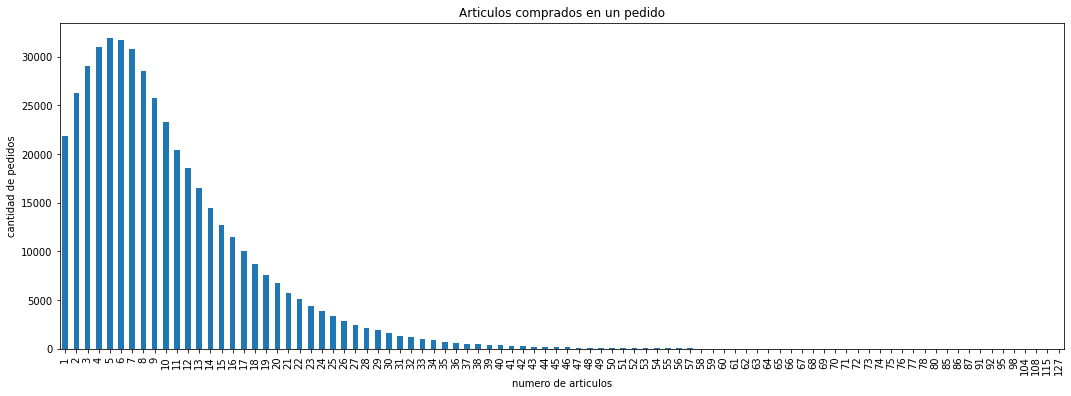

In [58]:
#order_product.groupby('order_id')['product_id'].size().sort_values().plot(kind='bar')
#plt.show()
order_product.groupby('order_id')['product_id'].count().value_counts().sort_index().plot(kind='bar', figsize=[18,6], 
                                                                                        title='Articulos comprados en un pedido',
                                                                                        xlabel='numero de articulos',
                                                                                        ylabel='cantidad de pedidos')
plt.show()
#se crea una grafica para saber cuantos articulos compra una persona en un pedido

Las personas suelen comprar de 1 a 10 articulos en un pedido. Esto indica que suelen comprar menos productos que mas productos.


### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [59]:
#Se une las tablas "order_product" y "product" mediante la columna "product_id"
princip=order_product.merge(product, on='product_id') #usamos merge para juntar las tablas
princip

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,CHICKEN BREAST TENDERS BREADED,129,1
1,147172,11440,7,1,CHICKEN BREAST TENDERS BREADED,129,1
2,3341719,11440,4,1,CHICKEN BREAST TENDERS BREADED,129,1
3,1938779,11440,8,1,CHICKEN BREAST TENDERS BREADED,129,1
4,1728338,11440,23,0,CHICKEN BREAST TENDERS BREADED,129,1
...,...,...,...,...,...,...,...
4545002,267402,45226,14,0,SWEET TERIYAKI CHICKEN OVEN SAUCE,5,13
4545003,2621676,25201,10,0,CRISP WATERS CANDLE SCENTS,101,17
4545004,937623,49153,2,0,SHINE COLLECTION BRILLANCE SHAMPOO,22,11
4545005,532895,8182,1,0,TOTAL MINT STRIPE GEL TOOTHPASTE,20,11


In [60]:
#Agrupamos por 'product_id' y 'product_name' para mostrar los nombres e IDs de los productos luego al sumar los valores de 0 y 1
#de la columna "reordered" se obtiene la cantidad de los que fueron en su mayoria reordenados.
principa_artic=princip.groupby(['product_id', 'product_name'])['reordered'].sum().sort_values(ascending=False).reset_index().head(20)
principa_artic

,product_id,product_name,reordered
0,24852,BANANA,55763
1,13176,BAG OF ORGANIC BANANAS,44450
2,21137,ORGANIC STRAWBERRIES,28639
3,21903,ORGANIC BABY SPINACH,26233
4,47209,ORGANIC HASS AVOCADO,23629
5,47766,ORGANIC AVOCADO,18743
6,27845,ORGANIC WHOLE MILK,16251
7,47626,LARGE LEMON,15044
8,27966,ORGANIC RASPBERRIES,14748
9,16797,STRAWBERRIES,13945


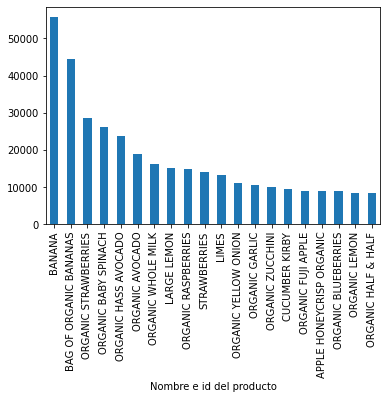

In [61]:
principa_artic.plot(x='product_name', y='reordered', kind='bar', xlabel='Nombre e id del producto', legend=False)
plt.show()

Observamos que los productos organicos vuelven a ser reordenados.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [62]:
product.head()

,product_id,product_name,aisle_id,department_id
0,1,CHOCOLATE SANDWICH COOKIES,61,19
1,2,ALL-SEASONS SALT,104,13
2,3,ROBUST GOLDEN UNSWEETENED OOLONG TEA,94,7
3,4,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...,38,1
4,5,GREEN CHILE ANYTIME SAUCE,5,13


In [63]:
order_product.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [64]:
tabla_prod=order_product.merge(product, on='product_id') #usamos merge para juntar las tablas
tabla_prod

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,CHICKEN BREAST TENDERS BREADED,129,1
1,147172,11440,7,1,CHICKEN BREAST TENDERS BREADED,129,1
2,3341719,11440,4,1,CHICKEN BREAST TENDERS BREADED,129,1
3,1938779,11440,8,1,CHICKEN BREAST TENDERS BREADED,129,1
4,1728338,11440,23,0,CHICKEN BREAST TENDERS BREADED,129,1
...,...,...,...,...,...,...,...
4545002,267402,45226,14,0,SWEET TERIYAKI CHICKEN OVEN SAUCE,5,13
4545003,2621676,25201,10,0,CRISP WATERS CANDLE SCENTS,101,17
4545004,937623,49153,2,0,SHINE COLLECTION BRILLANCE SHAMPOO,22,11
4545005,532895,8182,1,0,TOTAL MINT STRIPE GEL TOOTHPASTE,20,11


In [65]:
name=tabla_prod.groupby(['product_name', 'product_id'])['reordered'].mean().sort_values(ascending=False).reset_index()
name

,product_name,product_id,reordered
0,PEANUT BUTTER HONEY SPREAD,15657,1.0
1,VANILLA CREAM SELTZER,38821,1.0
2,ORGANIC BUTTERNUT SQUASH STRAWBERRY & ACAI SQU...,43738,1.0
3,SUPERFRUIT MIX JELLY BEANS,27031,1.0
4,PEANUT BUTTER & MOLASSES HEALTHY TREATS FOR DOGS,12560,1.0
...,...,...,...
45568,CLEAR PARTY CUPS,46367,0.0
45569,CLEAR MEASURING 2 CUP WITH MEASUREMENTS,6512,0.0
45570,CLEAR HAND SOAP,9222,0.0
45571,CLEAR FACE BREAK OUT FREE LIQUID LOTION SUNSCR...,23207,0.0


En el cuadro anterior vemos cual es la proporcion de los productos que son reordenados.

In [66]:
name.sample()

,product_name,product_id,reordered
32049,KIDS! CHEWABLES PROBIOTIC TABLETS NATURAL BURS...,29883,0.230769


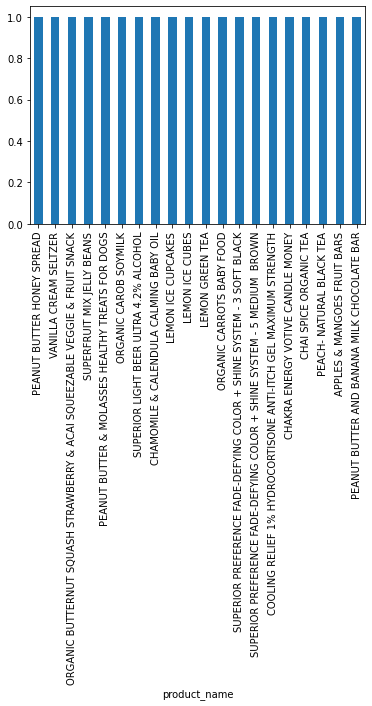

In [67]:
name.head(20).plot(x='product_name', y='reordered', kind='bar', legend=False)
plt.show()

Se muestra en el cuadro los primeros 20 productos que tienen una proporción de 1 con la que se vuelve a pedir.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [68]:
orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [69]:
order_product.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [70]:
tabla_cliente=order_product.merge(orders, on='order_id')#usamos merge para juntar las tablas
tabla_cliente.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2141543,11440,17,0,58454,25,0,15,8.0
1,2141543,31869,15,1,58454,25,0,15,8.0
2,2141543,30233,9,1,58454,25,0,15,8.0
3,2141543,27966,20,1,58454,25,0,15,8.0
4,2141543,13176,2,1,58454,25,0,15,8.0


In [71]:
cliente_pop=tabla_cliente.groupby('user_id')['reordered'].mean().sort_values(ascending=False).reset_index()
cliente_pop
#Usando "mean()" se muestra la proporcion con la que un usuario volvio a pedir un producto

,user_id,reordered
0,137587,1.0
1,173474,1.0
2,13918,1.0
3,62300,1.0
4,62307,1.0
...,...,...
149621,190953,0.0
149622,119371,0.0
149623,63173,0.0
149624,63163,0.0


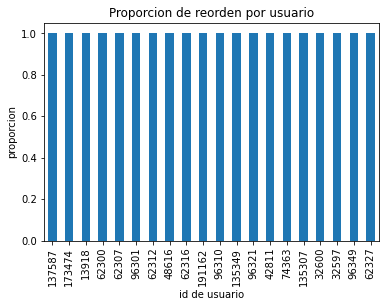

In [72]:
cliente_pop.head(20).plot(kind='bar', x='user_id', y='reordered', legend=False, title='Proporcion de reorden por usuario', xlabel='id de usuario', ylabel='proporcion')
plt.show()

Algunos clientes se muestra la proporción de los productos ya los habia pedido, incluso vuelven a pedir solo los mismos productos. En el grafico se observa los 20 primeros con reorden de sus productos.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [73]:
order_product.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1


In [74]:
product.head()

,product_id,product_name,aisle_id,department_id
0,1,CHOCOLATE SANDWICH COOKIES,61,19
1,2,ALL-SEASONS SALT,104,13
2,3,ROBUST GOLDEN UNSWEETENED OOLONG TEA,94,7
3,4,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...,38,1
4,5,GREEN CHILE ANYTIME SAUCE,5,13


In [75]:
tabla_carr=order_product.merge(product, on='product_id')#usamos merge para juntar las tablas
tabla_carr

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,CHICKEN BREAST TENDERS BREADED,129,1
1,147172,11440,7,1,CHICKEN BREAST TENDERS BREADED,129,1
2,3341719,11440,4,1,CHICKEN BREAST TENDERS BREADED,129,1
3,1938779,11440,8,1,CHICKEN BREAST TENDERS BREADED,129,1
4,1728338,11440,23,0,CHICKEN BREAST TENDERS BREADED,129,1
...,...,...,...,...,...,...,...
4545002,267402,45226,14,0,SWEET TERIYAKI CHICKEN OVEN SAUCE,5,13
4545003,2621676,25201,10,0,CRISP WATERS CANDLE SCENTS,101,17
4545004,937623,49153,2,0,SHINE COLLECTION BRILLANCE SHAMPOO,22,11
4545005,532895,8182,1,0,TOTAL MINT STRIPE GEL TOOTHPASTE,20,11


In [76]:
tabla_add=tabla_carr[tabla_carr['add_to_cart_order']==1] #para los productos que se añaden primero en el carrito de compras
tabla_add

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
6,1463503,11440,1,0,CHICKEN BREAST TENDERS BREADED,129,1
17,2201430,11440,1,1,CHICKEN BREAST TENDERS BREADED,129,1
21,1036054,11440,1,1,CHICKEN BREAST TENDERS BREADED,129,1
50,3008652,11440,1,1,CHICKEN BREAST TENDERS BREADED,129,1
62,2946144,11440,1,1,CHICKEN BREAST TENDERS BREADED,129,1
...,...,...,...,...,...,...,...
4544972,1518168,16952,1,0,SENSITIVE NIGHT CREAM,73,11
4544977,1776450,21507,1,0,GLUTEN FREE ALL-PURPOSE RICE FLOUR BLEND,17,13
4544995,2333206,25467,1,0,MADAGASCAR PURE VANILLA,17,13
4545005,532895,8182,1,0,TOTAL MINT STRIPE GEL TOOTHPASTE,20,11


In [77]:
carrito_pop=tabla_add.groupby(['product_id', 'product_name'])['add_to_cart_order'].count().sort_values(ascending=False).reset_index().head(20)
carrito_pop
#se muestra los principales 20 productos que las personas suelen colocar primero en sus carritos

,product_id,product_name,add_to_cart_order
0,24852,BANANA,15562
1,13176,BAG OF ORGANIC BANANAS,11026
2,27845,ORGANIC WHOLE MILK,4363
3,21137,ORGANIC STRAWBERRIES,3946
4,47209,ORGANIC HASS AVOCADO,3390
5,21903,ORGANIC BABY SPINACH,3336
6,47766,ORGANIC AVOCADO,3044
7,19660,SPRING WATER,2336
8,16797,STRAWBERRIES,2308
9,27966,ORGANIC RASPBERRIES,2024


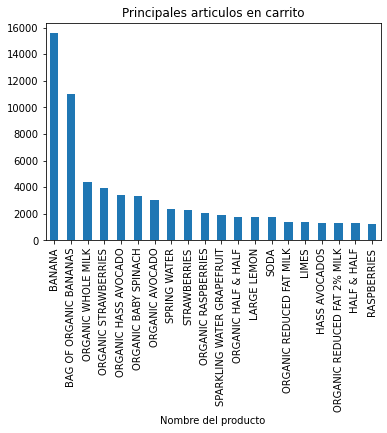

In [78]:
carrito_pop.plot(kind='bar', x='product_name', y='add_to_cart_order', legend=False, xlabel='Nombre del producto',
                title='Principales articulos en carrito')
plt.show()

Las personas suelen colocar en sus carritos, productos organicos, asi como frutas y verduras como se observa en el cuadro anterior.

### Conclusion general del proyecto:

- En Instacart personas añaden en su carrito de compras como primera opción productos organicos.

- Las horas con mayor demanda de compras sueñe darse desde las 10:00 horas hasta las 17:00 horas, las cuales coinciden con las horas en que una persona desayuna o almuerza.


- Los dias sabados suele aumentar lo pedidos, esto podría ser debido a que los fines de semana la mayoria de personas prefieren comprar a preparar.

- Las personas suelen comprar poca cantidad de productos a una elevada cantidad de los mismos, esto podria deberse a  factores externos o no considerados como que clientes solo compran lo necesario o el costo de envio por peso, entre otros.